# Polynomials in nonlinear dynamics

## EMRG seminar 7th October 2022

### Oscar Benjamin

## Outline

- Review of basic nonlinear dynamics workflow
- Radical formulae and Abel-Ruffini theorem
- Calculating roots numerically
- Working with roots symbolically
- Resultants and discriminants
- Groebner bases
- Worked examples

In [1]:
from sympy import *
init_printing()

## Nonlinear dynamics example

Techniques today are general but we need a target problem to demonstrate them.

Consider a system of ODEs something like Lotka Volterra:

$$
\begin{align}
\dot{x} &= \alpha x - \beta x y \\
\dot{y} &= \delta x y - \gamma y
\end{align}
$$

- The rhs are polynomial functions of $x$ and $y$.
- The coefficients are polynomials in $\alpha$, ...
- Algebraically this is $\mathbb{Q}[\alpha,\beta,\delta,\gamma][x, y]$
- Explicit solutions like $x = f(t)$ are not easily obtained.
- Study behaviour qualitatively

# Equilibrium analysis

- Solve for the equilibria
- How do they depend on the parameters?

In [2]:
alpha, beta, delta, gamma, x, y = symbols('alpha, beta, delta, gamma, x, y')

eqs_rhs = [alpha*x - beta*x*y, delta*x*y - gamma*y]

display(eqs_rhs)

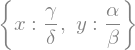

In [3]:
sol1, sol2 = solve(eqs_rhs, [x, y], dict=True)
display(sol1)
display(sol2)

# Linear stability

- Calculate the Jacobian
- Substitute the equilbria and calculate eigenvalues
- See where eigenvalues are in the complex plane

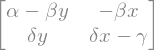

In [4]:
J = Matrix(eqs_rhs).jacobian([x, y])
display(J)

In [5]:
J.subs(sol1).eigenvals() # unstable if alpha > 0

In [6]:
J.subs(sol2).eigenvals() # imaginary eigenvalues

## Equilibrium analysis

1. Solve equilibrium equations for $(x_1,y_1), (x_2,y_2), \ldots$.
2. Compute Jacobian, $J$.
3. Substitute equilibrium solutions to get $J_1, J_2, \ldots$.
4. Compute eigenvalues $\lambda_{i1}, \lambda_{i2}, \ldots$ of $J_i$.

**Note:** Steps 1 and 4 involve "solving" polynomial equations but we don't really want the solutions: $(x_i, y_i)$ are only needed to get $J_i$ which is only needed for $\lambda_{ij}$. Actually we don't even really need $\lambda_{ij}$. What we do want is:

1. Know how many equilibria there are.
2. Say which part of the complex plane the eigenvalues are in.
3. Find bifurcations of equilibria or eigenvalues

# Calculating roots of polynomials

Quadratic formula:

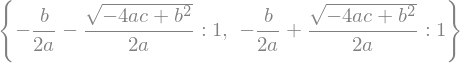

In [7]:
a, b, c, d, e, x = symbols('a, b, c, d, e, x')

p2 = a*x**2 + b*x + c
display(p2)
display(roots(p2, x))

- $b^2 - 4ac$ is the discriminant $\Delta$
- $\Delta = 0$ implies a double root.
- $\Delta = 0$ separates the cases of real and non-real roots.
- Formula breaks down for $a = 0$.

# Cubic formula

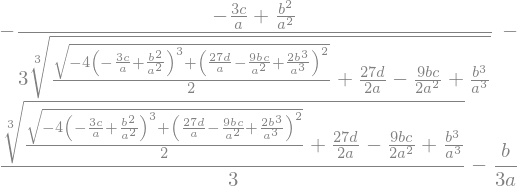

In [8]:
p3 = a*x**3 + b*x**2 + c*x + d

r1, r2, r3 = roots(p3, x)
display(r1)

In [9]:
discriminant(p3, x)

- Always one real root
- Other roots might be real or non-real ($\Delta=0$ separates the cases)
- Casus irreducibilus means complex numbers needed for real roots

# Quartic formula

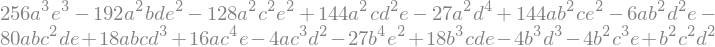

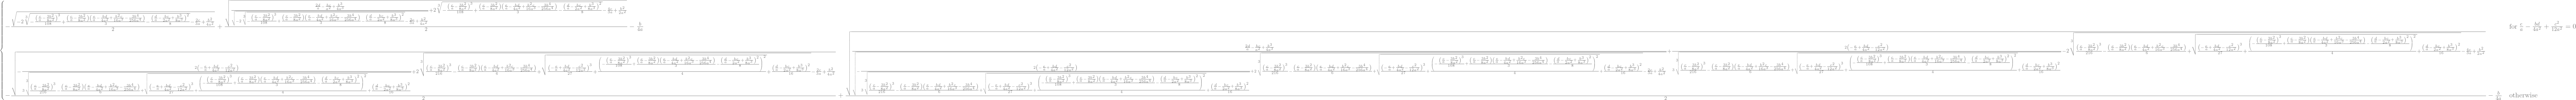

In [10]:
p4 = a*x**4 + b*x**3 + c*x**2 + d*x + e

r1, r2, r3, r4 = roots(p4, x)
display(discriminant(p4, x))
display(r1)

# Quintic formula?

**Abel-Ruffini Theorem:** polynomials of degree 5 or more can (and usually do) have roots that are not expressible in radicals.

- No general radical formula for roots of polynomials of degree 5 or more.
- No explicit expression for eigenvalues of bigger than 4x4 matrix (unless lucky).
- No explicit solutions for most polynomial systems more complicated than a pair of quadratic equations.
- Equilibrium analysis workflow breaks down in two places

**HOWEVER:** Radicals are horrible anyway. Better to work with the polynomials themselves!

# Calculating polynomial roots numerically

Different kinds of "numerics":

- Ordinary fixed precision floating point (e.g. IEE 754 64-bit binary floats).
- Variable precision floating point
- Robust numerics (adaptive precision with error control)
- Certified numerics (adaptive precision with hard error bounds)
- Exact numerics

We need robust, certified and/or exact numerics because polynomials can easily be numerically ill conditioned.

# Wilkinson's polynomial

In [11]:
x = symbols('x')
p30 = prod((x-i) for i in range(1, 30+1))
display(p30)

In [12]:
import numpy as np # Uses fixed precision floats (64 bit)
coeffs = Poly(p30, x).all_coeffs()
for r in np.roots(coeffs)[::-1]: print(r)

(0.9999999999994696+0j)
(2.0000000001525633+0j)
(2.9999999872792795+0j)
(4.000000412187586+0j)
(4.99999792987829+0j)
(5.999816391359944+0j)
(7.005187059493201+0j)
(7.940176425396051+0j)
(9.150021994003938-0.5377774833024049j)
(9.150021994003938+0.5377774833024049j)
(10.65864273565793-1.444716042203708j)
(10.65864273565793+1.444716042203708j)
(12.138996892119444-2.452883247750382j)
(12.138996892119444+2.452883247750382j)
(13.99709122834676-3.743071677416666j)
(13.99709122834676+3.743071677416666j)
(17.32618062948736+0j)
(16.435811218566744-4.996688041527301j)
(16.435811218566744+4.996688041527301j)
(19.335194180881192-5.940471480143673j)
(19.335194180881192+5.940471480143673j)
(22.524118588994597-6.299110096683628j)
(22.524118588994597+6.299110096683628j)
(25.76309365056976-5.9086416174806455j)
(25.76309365056976+5.9086416174806455j)
(28.772865161933748-4.694756641075301j)
(28.772865161933748+4.694756641075301j)
(31.088665863070887-2.6265246469750307j)
(31.088665863070887+2.626524646975

# Wilkinson's polynomial with better numerics

In [13]:
# nroots(p30)             # raises NoConvergenceError
nroots(p30, maxsteps=100) # succeeds (slowly)

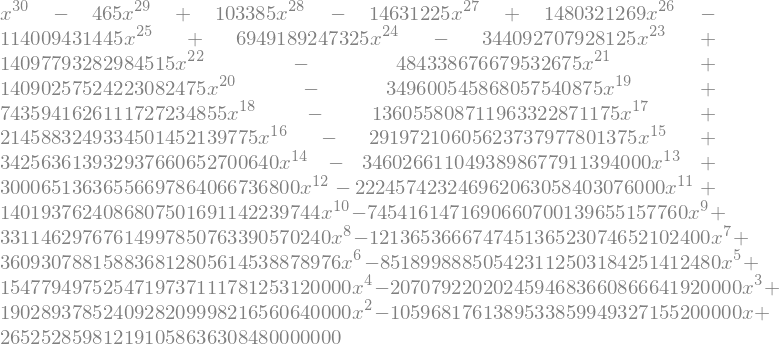

In [14]:
p30e = p30.expand()
display(p30e)
display(roots(p30e, x, multiple=True)) # SymPy's roots function (uses exact factorisation)

# Exact roots of irreducible polynomials

In [15]:
p5 = x**5 - x + 1 # irreducible quintic
roots(p5)         # fails because no radical formula possible

In [16]:
Poly(p5, x).all_roots()

RootOf can represent **all** roots of **any** univariate polynomial with **rational** coefficients (any $p \in\mathbb{Q}[x]$).

- First factor the polynomial into irreducibles.
- Represent a root with an irreducible polynomial and an index.
- Exact numeric root isolation algorithm is used to distinguish the roots.
- An ordering scheme determines the index of each root.
- Fully computable representation of the algebraic numbers $\bar{\mathbb{Q}}$.

## RootOf

- Always determine the exact multiplicity of all roots.
- Say precisely which roots are real or not.
- Say which are complex conjugates of one another.
- Represent roots exactly and also compute arbitrarily accurate approximations.

In [17]:
r0 = RootOf(p5, 0)
display(r0.evalf(100))
display(r0.is_real)

True

In [18]:
r1 = RootOf(p5, 1)
display(r1.evalf())
display(r1)
display(r1.conjugate())

# Symbolic manipulation needs the polynomial (not the roots)

In [19]:
# For heavy symbolic work we need to create a ring:
K = QQ.algebraic_field(sqrt(2))

# Convert an ordinary tree expression into the ring:
e = K.from_sympy(4*sqrt(2) + 5)

display(K)
display(e)

QQ<sqrt(2)>

ANP([mpq(4,1), mpq(5,1)], [mpq(1,1), mpq(0,1), mpq(-2,1)], QQ)

- `ANP` stands for Algebraic Number Poly.
- `QQ` means the rationals $\mathbb{Q}$.
- `K` is $\mathbb{Q}(\sqrt{2})$.
- Read the above as "$4x + 5 \mod x^2 - 2$"
- `ANP` does not care whether $x$ is $+\sqrt{2}$ or $-\sqrt{2}$ (it just wants the polynomial).

# Finding the polynomial (since we need it)

In [20]:
minpoly(sqrt(2)) # SymPy's minpoly function

In [21]:
minpoly(cos(pi/11))

In [22]:
minpoly(sqrt(2) + sqrt(3))

- Every algebraic number has a minimal polynomial.
- Computing it can expensive in some cases but obviously not with RootOf:

In [23]:
r0

In [24]:
minpoly(r0)

# Conclusions so far:

- A polynomial already is the best way to represent its own roots.
- Radicals are horrible so Abel-Ruffini is irrelevant.
- It is better to have the polynomial than a radical formula for its roots.
- Numerically it is better to have the polynomial.
- Symbolically it is better to have the polynomial.
- Even the quadratic formula should not be used!
- **Having a polynomial equation for $x$ already means that $x$ is "known"**

# Resultants (first definition)

Given two polynomials $$p_a(x) = a_0 x^2 + a_1 x + a_2 \quad\quad p_b(x) = b_0 x^3 + b_1 x^2 + b_2 x + b_3$$ we can define their Sylvester matrix:
$$
S(p_a, p_b) = \left[\begin{matrix}a_{0} & 0 & 0 & b_{0} & 0\\a_{1} & a_{0} & 0 & b_{1} & b_{0}\\a_{2} & a_{1} & a_{0} & b_{2} & b_{1}\\0 & a_{2} & a_{1} & b_{3} & b_{2}\\0 & 0 & a_{2} & 0 & b_{3}\end{matrix}\right]
$$
The determinant of $S$ is known as the (Sylvester-)resultant of the two polynomials:

$$\operatorname{res}_x(p_a, p_b) = \det(S(p_a, p_b))$$.

If $p_a,p_b \in R[x]$ then $\operatorname{res}_x(p_a, p_b) \in R$.

# Resultants (second definition)

Given two polynomials

$$p_a(x) = a_0(x - \lambda_1)(x-\lambda_2) \quad\quad p_b(x) = b_0(x - \mu_1)(x - \mu_2)(x - \mu_3)$$

the resultant is defined as
$$
\operatorname{res}_x(p_a, p_b) = a_0^3 b_0^2 \prod_{i,j} (\lambda_i - \mu_j)
$$
If the ring of coefficients for the two polynomials is an integral domain (always true for our purposes) then this is equivalent to the previous definition.

**Conclusion:** Two polynomials have a root in common iff their resultant is zero.

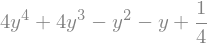

In [25]:
x, y = symbols('x, y') # use SymPy's resultant function
pa = x**2 + y**2 - 1
pb = x**2 + y + 3*y**2 - S(3)/2
resultant(pa, pb, x) # When this is zero pa and pb have a common root for x.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def latexd(expr):
    return rf'${latex(expr)}$'

def show_zeros(expr, x, y, subs={}, xlim=(-2, 2), ylim=(-2, 2), npoints=1000):
    if isinstance(expr, list):
        multiple = True
        exprs = expr
    else:
        multiple = False
        exprs = [expr]

    xvals = np.linspace(*xlim, 1000)
    yvals = np.linspace(*ylim, 1000)
    X, Y = np.meshgrid(xvals, yvals)
    fs1 = [lambdify((x, y), expr.subs(subs)) for expr in exprs]
    fs2 = [lambdify((x, y), sqf_part(expr.subs(subs))) for expr in exprs]
    Fs1 = [f(X, Y) for f in fs1]
    Fs2 = [f(X, Y) for f in fs2]
    Fcs = [np.sign(F)*np.log(1 + np.abs(F)) for F in Fs1]

    plt.figure()
    if not multiple:
        [Fc] = Fcs
        maxabs = np.max(np.abs(Fc))
        plt.imshow(Fc[::-1,:], extent=xlim+ylim, vmin=-maxabs, vmax=maxabs, aspect='auto')
        for F in Fs2:
            obj = plt.contour(X, Y, F, levels=[0])
    else:
        for F, col in zip(Fs2, ['red', 'blue']):
            obj = plt.contour(X, Y, F, levels=[0], colors=[col])
    title = ',    '.join([latexd(e) for e in exprs])
    if subs:
        title += '\t' + latexd(subs)
        title += '\n' + ',    '.join([latexd(e.subs(subs)) for e in exprs])
    plt.title(title)
    plt.xlabel(latexd(x), size='x-large')
    plt.ylabel(latexd(y), size='x-large', rotation=0)

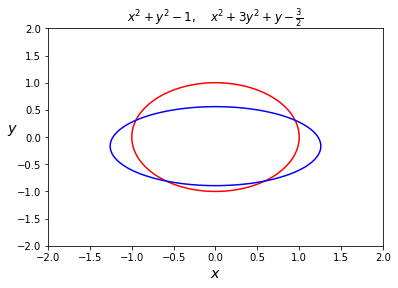

In [27]:
show_zeros([pa, pb], x, y)

In [28]:
[r.evalf(2) for r in real_roots(resultant(pa, pb, x))]

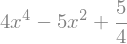

In [29]:
resultant(pa, pb, y)

In [30]:
[r.evalf(2) for r in real_roots(resultant(pa, pb, y))]

# Resultants example: eigenvalues on the imaginary axis

Suppose we have a system of ODEs of dimension 5 and the characteristic polynomial is quintic.

In [31]:
a, b, c, d, e, lr, li = symbols('a, b, c, d, e, lambda_r, lambda_i', real=True)
l = Symbol('lambda')

pl = Poly([1, a, b, c, d, e], l).as_expr()
pl

In [32]:
pl.subs({l:lr + I*li})

In [33]:
pre, pim = pl.subs({l:I*li}).as_real_imag()
display(pre)
display(pim)

An eigenvalue is on the imaginary axis when these have a common real root.

# Resultants example continued...

An eigenvalue resides on the imaginary axis when there is a common real root:

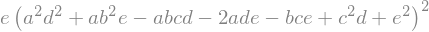

In [34]:
cond = factor(resultant(pre, pim, li)) # using factor helps
display(pl)
display(cond)

- `cond = 0` iff there is a common root of `pre`, `pim` (but might not be real).
- Condition $e=0$ means an eigenvalue is equal to 0.
- The other condition is for a Hopf bifurcation.
- Multiplicity of factors is important (2 eigenvalues in the case of Hopf)
- Although `pl` is quintic `cond` is quadratic (after factorisation)

# Discriminants

Given a polynomial $p = a_n x^n + a_{n-1} x^{n-1} + \cdots$ the discriminant is defined as
$$
\operatorname{disc}_x(p) = \frac{(-1)^{\frac{n(n-1)}{2}}}{a_n} \operatorname{res}_x(p, p')
$$
where $p'$ means the formal derivative of $p$.

In [35]:
a, b, c, x = symbols('a, b, c, x')
pq = a*x**2 + b*x + c
discriminant(pq, x)

In [36]:
factor(resultant(pq, pq.diff(x), x))

- If $p \in R[x]$ then $\operatorname{disc}_x(p) \in R$.
- The discriminant is equal to zero iff $p$ has a multiple root.

# Discriminant example

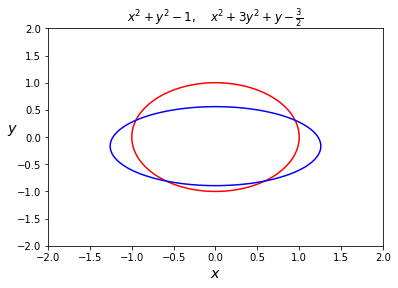

In [37]:
show_zeros([pa, pb], x, y)

In [38]:
disc = discriminant(pb, y)
display(disc)
display(nroots(disc, 3))

**Key point:** All the significant points in the plot are obtained by discriminants and resultants.

# Groebner bases

- Come from Buchberger and Groebner in the 50s.
- Proper way to solve systems of polynomial equations.
- Give the solutions in *implicit* form.
- Can always be computed for any system of polynomial equations over a *field*.

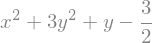

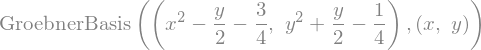

GroebnerBasis([x**2 - y/2 - 3/4, y**2 + y/2 - 1/4], x, y, domain='QQ', order='lex')


In [39]:
display(pa)
display(pb)
gb = groebner([pa, pb], [x, y]) # SymPy's groebner function
display(gb)
print(gb)

# Separated Groebner basis

Introduce a new variable $s = x + y$ (this is a guess).

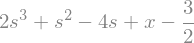

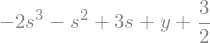

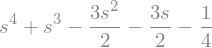

In [40]:
s = symbols('s')
gb = groebner([pa, pb, s - (x + y)], [x, y, s])
for pg in gb:
    display(pg)

- One to one correspondence between $s$ and $(x, y)$
- Form of the basis confirms the validity of the choice $s = x + y$.
- All solutions expressible in `RootOf` based on poly for $s$.

# Nonlinear dynamics examples

Find equilibria of
$$
\begin{align}
\dot{x} &= axy + z \\
\dot{y} &= x - y^2 \\
\dot{z} &= z - x
\end{align}
$$

In [41]:
x, y, z = symbols('x, y, z') # variables
a = symbols('a')             # parameter

eqs_rhs = [a*x*y + z, x - y**2, z - x]
gb = groebner(eqs_rhs, [x, y, z])
display(gb)
print(gb)

GroebnerBasis([x - z, y**2 - z, a*y*z + z, a**2*z**2 - z], x, y, z, domain='ZZ[a]', order='lex')


Not separated: need a separating variable.

# Nonlinear dynamics example

In [42]:
s = symbols('s')
gb2 = groebner(eqs_rhs + [s - (x + y + z)], [x, y, z, s])
for pb in gb2:
    display(pb)

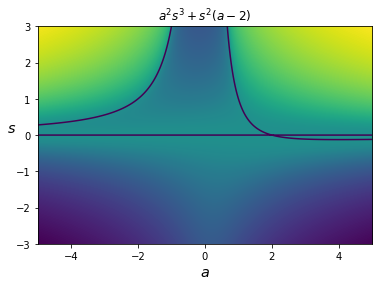

In [43]:
show_zeros(gb2[-1], a, s, xlim=(-5, 5), ylim=(-3, 3))

# New random example

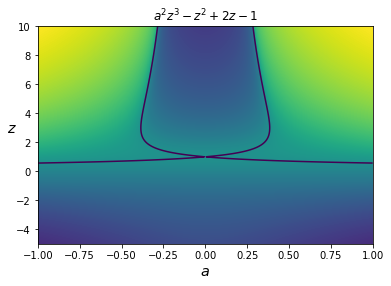

In [44]:
x, y, z = symbols('x, y, z') # variables
a = symbols('a')             # parameter
eqs_rhs = [a*x*y - z + 1, x - y**2, z - x] # slightly modified ODEs
gb = groebner(eqs_rhs, [x, y, z])
display(gb)
show_zeros(gb[-1], a, z, xlim=(-1, 1), ylim=(-5, 10))

In [45]:
factor(discriminant(gb[-1], z))

# Two parameters

In [46]:
x, y, z = symbols('x, y, z') # variables
a, b = symbols('a, b')             # parameters
eqs_rhs = [a*x*y - z + 1, x - y**2, z - x + b] # slightly modified ODEs
gb = groebner(eqs_rhs, [x, y, z])
cond = discriminant(gb[-1], z)
for pb in gb:
    display(pb)
display(cond)

In [47]:
factor(cond)

In [48]:
discriminant(factor(cond).args[-1], a)

# Two parameters continued

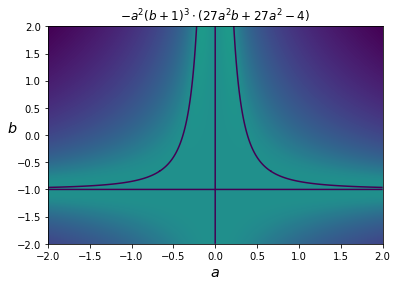

In [49]:
show_zeros(factor(cond), a, b)

- Two parameter bifurcation diagram
- Straight lines are artifacts
- Curved lines are the saddle node bifurcations

# Lotka Volterra again

In [50]:
alpha, beta, delta, gamma, x, y = symbols('alpha, beta, delta, gamma, x, y')
l = symbols('lambda')

eqs_rhs = [alpha*x - beta*x*y, delta*x*y - gamma*y]

J = Matrix(eqs_rhs).jacobian([x, y])
p = J.charpoly(l).as_expr()
p

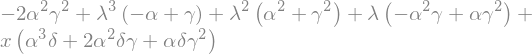

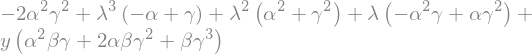

In [51]:
gblv = groebner(eqs_rhs + [p], [x, y, l]) # include characteristic polynomial in basis
for pb in gblv:
    display(pb)

In [52]:
gblv[-1].factor()